In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [3]:
from quantum_monte_carlo.probabilities import classical_particle_probability
from quantum_monte_carlo.potentials import Potentials

# Particula en un potencial armónico con $T \rightarrow 0$

In [37]:
random.seed(42)
harmonic_oscillator = Potentials().harmonic_oscillator

Se tiene que $T = 1/\beta$, cuando $T \rightarrow 0$ entonces $\beta \rightarrow \infty$. Por lo que $\pi(x) \sim \exp(-\beta x^{2}/2) = \exp(- (x^{2}/2) (1/T)) \rightarrow \delta(x) $

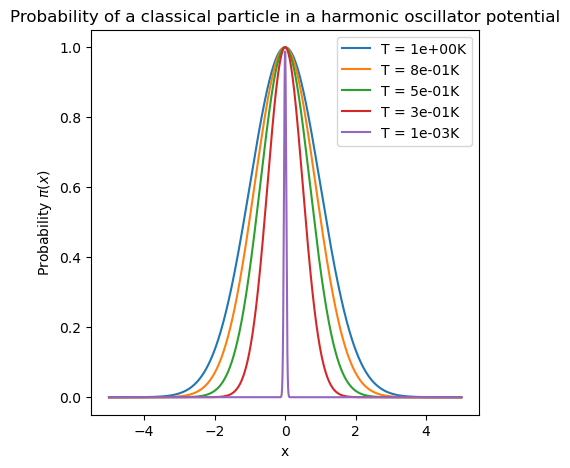

In [38]:
x = np.linspace(-5, 5, 1000)
T = np.linspace(1, 1e-3, 5)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for i in range(len(T)):
    ax.plot(x, classical_particle_probability(x, harmonic_oscillator, T[i]), label='T = {:0.0e}K'.format(T[i]))
ax.set_ylabel('Probability $\pi(x)$')
ax.set_xlabel('x')
ax.set_title('Probability of a classical particle in a harmonic oscillator potential')    
ax.legend()

In [39]:
class Quantum_Particle:
    """Quantum particle in a harmonic oscillator potential"""
    def __init__(self):
        self.psi = None

    def set_psi(self, psi):
        self.psi = psi

    def set_potential(self, potential):
        self.potential = potential

    def psi_squared(self, x, n):
        return self.psi(x, n)**2

    def probability(self, x, n):
        return np.abs(self.psi_squared(x, n))

In [40]:
def ho_psi(x, n):
    arr = np.zeros(n+1)
    arr[n] = 1
    return 1/np.sqrt(2**n*np.math.factorial(n))*np.exp(-(x**2.)/2.)*np.polynomial.hermite.Hermite(arr)(x) * np.pi**(-1/4)

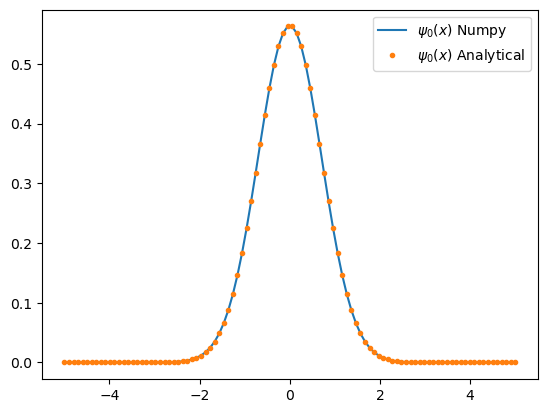

In [41]:
def psi_0(x):
    return np.exp(- x ** 2. / 2.) / np.pi**(1/4)

x = np.linspace(-5, 5, 100)
phi_0_func = ho_psi(x, 0)

plt.plot(x, phi_0_func**2, label='$\psi_0(x)$ Numpy')
plt.plot(x, psi_0(x)**2, '.', label='$\psi_0(x)$ Analytical')
plt.legend()

In [42]:
def metropolis(x, delta, prob, n, N_steps):
    """Metropolis algorithm.
    
    Args:
        x (float): initial position of the particle
        delta (float): (minimum) maximum shift in position
        prob (function): probability function
        n (int): quantum number
        N_steps (int): number of steps
    Returns:
        float: all positions accepted by the algorithm"""
    xs = []
    for i in range(N_steps):
        x_new = x + random.uniform(-delta, delta)
        #if random.uniform(0.0, 1.0) < ((psi_0(x_new))**2 / (psi_0(x))**2) :
        if random.uniform(0.0, 1.0) < (prob(x_new, n)/prob(x, n)):
            x = x_new
            xs.append(x)
    
    return np.array(xs)

In [43]:
ho_particle = Quantum_Particle()
ho_particle.set_psi(ho_psi)
ho_particle.set_potential(harmonic_oscillator)
ho_prob = ho_particle.probability

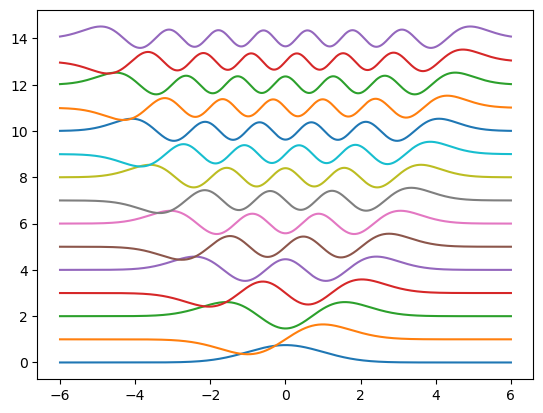

In [44]:
x  = np.linspace(-6, 6, 1000)

for n in range(15):
    plt.plot(x, ho_particle.psi(x, n) + n, label='$\psi_{}(x)$'.format(n))


In [45]:
xs = metropolis(0.0, 0.1, ho_prob, 0, 1000000)

In [46]:
range_ = np.linspace(xs.min(), xs.max(), 1000)
psi_square = ho_particle.psi_squared(range_, 0)

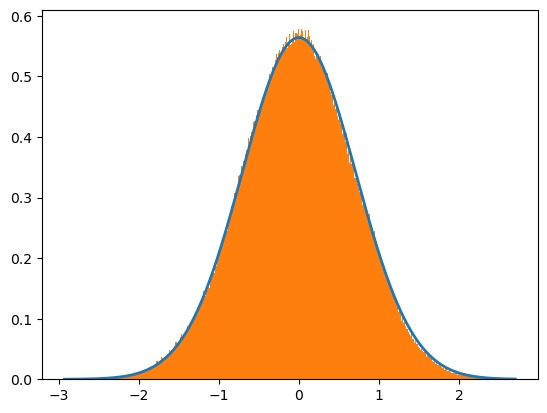

In [48]:
plt.plot(range_, psi_square, linewidth=2, label='$\pi(x)$')
pylab.hist(xs, 500, density=True, label='Metropolis');

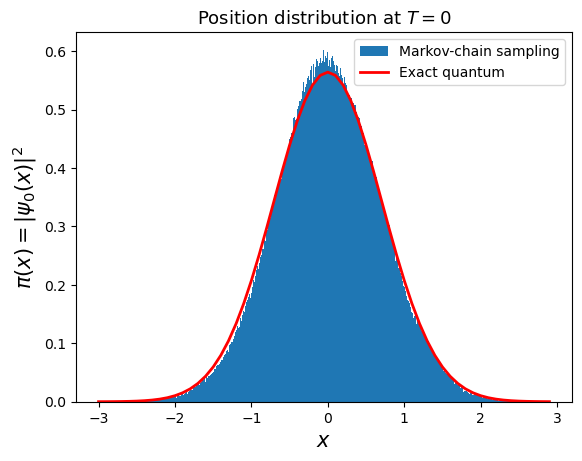

In [50]:
import random, math, pylab
from math import *

def psi_0_sq(x):
    psi = exp(- x ** 2.0 / 2.0) / pi ** (1.0 / 4.0)
    return abs(psi) ** 2.0

xx = 0.0
delta = 0.1
hist_data = []
for k in range(1000000):
    x_new = xx + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi_0_sq(x_new) / psi_0_sq(xx): 
        xx = x_new 
        hist_data.append(xx)
    #print x
    
pylab.hist(hist_data, 500, density = 'True', label='Markov-chain sampling') #histogram of the sample
x = [a / 10.0 for a in range(-30, 30)]
y = [psi_0_sq(a) for a in x]
pylab.plot(x, y, c='red', linewidth=2.0, label='Exact quantum')
pylab.title('Position distribution at $T=0$', fontsize = 13)
pylab.xlabel('$x$', fontsize = 15)
pylab.ylabel('$\pi(x)=|\psi_0(x)|^2$', fontsize = 15)
pylab.legend()
#pylab.savefig('plot_T0_prob.png')
#pylab.show()

In [ ]:
class Harmonic_Oscillator:
    def __init__(self) -> None:
        pass

    def E(n):
        return n + 1/2
    
    def psi(x, n):
        if n<0:
            return 0
        else:
            
            arr = np.zeros(n+1)
            arr[n] = 1
            
            return 1/np.sqrt(2**n*np.math.factorial(n))*np.exp(-(x**2.)/2.)*np.polynomial.hermite.Hermite(arr)(x) * np.pi**(-1/4)
    
    def psi_squared(x, n):
        return Harmonic_Oscillator.psi(x, n)**2
    
    def probability(x, n, T):
        beta = 1/T
        psi_square = np.abs(Harmonic_Oscillator.psi_squared(x, n))
        return psi_square * np.exp(-beta, Harmonic_Oscillator.E(n))

# Particula en un potencial armónico a temperatura finita

In [ ]:
def proabibility(psi, n):
    return np.abs(psi(x, n))**2 * En